<a href="https://colab.research.google.com/github/Rohan2390/AVENDI_PYTORCH/blob/main/notebooks/Dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
import os
import pandas as pd
import random
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from random import randint

In [ ]:
!pip install pydicom
import pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


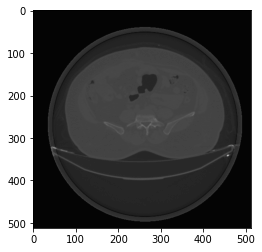

In [ ]:
image = np.load('/content/drive/MyDrive/Curim/numpy/hernia/EA_001_VarFat_00300.npy')
plt.imshow(image, cmap = 'gray')

In [ ]:
csv=pd.read_csv('/content/drive/MyDrive/Curim/Phase 1 key.xlsx - Sheet1 (4).csv',index_col=0)

In [ ]:
path2data1 = '/content/drive/MyDrive/Curim/numpy/hernia1'
path2data2 = '/content/drive/MyDrive/Curim/numpy/non_hernia1'

filenames1 = os.listdir(path2data1)
filenames2 = os.listdir(path2data2)
filenames = filenames1 + filenames2

full_filenames = [os.path.join(path2data1, f) for f in filenames1]+ [os.path.join(path2data2, f) for f in filenames2]

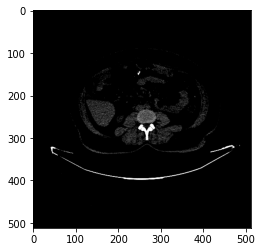

In [ ]:
a=np.load(full_filenames[0])
plt.imshow(a,cmap='gray')

In [ ]:
full_filenames[0]

'/content/drive/MyDrive/Curim/numpy/hernia1/EA_001_VarFat_00261.npy'

In [ ]:
len(full_filenames)

2831

In [ ]:
labels=[]
for i in full_filenames:
  label = csv._get_value(i.split('/')[-1][:-10], 'Hernia?')
  labels.append(label)

In [ ]:
labels[0]

1

In [ ]:
len(labels)

2831

In [ ]:
import collections
y_train = labels
counter_train = collections.Counter(y_train)
counter_train


Counter({0: 1365, 1: 1466})

### Creating a custom dataset# 

In [ ]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from tqdm import tqdm

In [ ]:
class hernia_dataset(Dataset):

  def __init__(self, data_dir1,data_dir2, transform):
  
    path2data1 = data_dir1
    path2data2 = data_dir2
    
    filenames1 = os.listdir(path2data1)
    filenames2 = os.listdir(path2data2)
    filenames = filenames1 + filenames2
    
    self.full_filenames = [os.path.join(path2data1, f) for f in filenames1]+ [os.path.join(path2data2, f) for f in filenames2]
    random.shuffle(self.full_filenames)
    
    labels=[]
    csv=pd.read_csv('/content/drive/MyDrive/Curim/Phase 1 key.xlsx - Sheet1 (4).csv',index_col=0)
    for i in self.full_filenames:
      label = csv._get_value(i.split('/')[-1][:-10], 'Hernia?')
      labels.append(label)
    self.labels = labels
    
    self.transform = transform
      
  def __len__(self):
    return len(self.full_filenames)

  def __getitem__(self, idx):
    image = np.load(self.full_filenames[idx]).astype('float64')
    image = self.transform(image)

    return image, self.labels[idx]

In [ ]:
data_transformer = transforms.Compose([transforms.ToTensor()])

In [ ]:
data_dir1 = '/content/drive/MyDrive/Curim/numpy/hernia1'
data_dir2 = '/content/drive/MyDrive/Curim/numpy/non_hernia1'
hernia_d = hernia_dataset(data_dir1,data_dir2, data_transformer)

In [ ]:
len(hernia_d)

2831

In [ ]:
len(hernia_d)
img, labels = hernia_d[4]

In [ ]:
#Spliting 
from torch.utils.data import random_split

len_hernia = len(hernia_d)
len_train = int(0.95 * len_hernia)
len_val = len_hernia - len_train

In [ ]:
train_ds, val_ds = random_split(hernia_d, [len_train, len_val])

In [ ]:
print(f"Train Dataset Length: {len(train_ds)}")
print(f"Validation Dataset Length: {len(val_ds)}")

Train Dataset Length: 2689
Validation Dataset Length: 142


In [ ]:
for x,y in train_ds:
    print(x.shape, y)
    break

torch.Size([1, 512, 512]) 0


In [ ]:
from torchvision import utils
def show(img, y = None):
  npimg = img.numpy()
  npimg_tr = np.transpose(npimg, (1,2,0))
  plt.title(str(y))
  plt.imshow(npimg_tr, interpolation = 'nearest')

image indices: [1083  467 1443 1769]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 516, 2058])


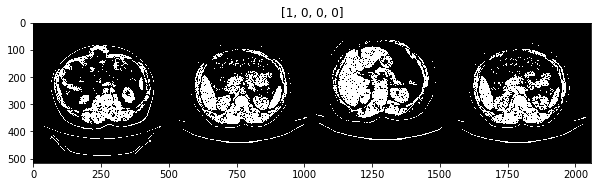

In [ ]:
grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print("image indices:", rnd_inds)

x_grid_train = [train_ds[i][0] for i in rnd_inds]
y_grid_train = [train_ds[i][1] for i in rnd_inds]

x_grid_train = utils.make_grid(x_grid_train, nrow = 4, padding = 2)

print(x_grid_train.shape)

plt.figure(figsize=(10,4))
show(x_grid_train, y_grid_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 516, 2058])


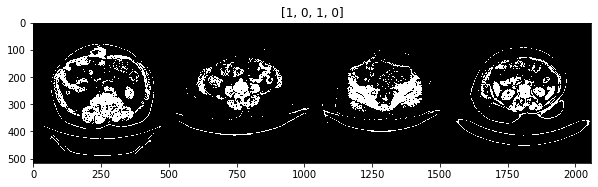

In [ ]:
#validation set
grid_size = 4
random_ind = np.random.randint(0, len(val_ds),4)

x_val_grid = [val_ds[i][0] for i in random_ind]
y_val_grid = [val_ds[i][1] for i in random_ind]

x_val_grid = utils.make_grid(x_val_grid, nrow = 4, padding = 2)

print(x_grid_train.shape)

plt.figure(figsize = (10,4))
show(x_val_grid, y_val_grid)